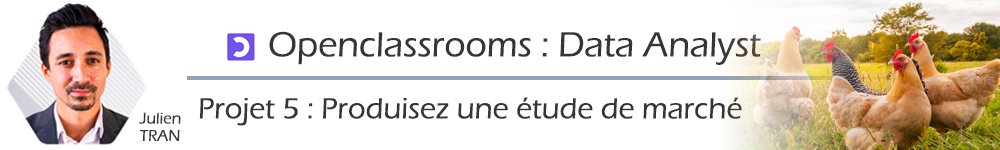

### Mission 4 : Visualisez vos  partitions dans le premier plan factoriel obtenu par ACP.

Dans votre partition, vous avez obtenu des groupes distincts. Vérifiez donc qu'ils diffèrent réellement. Pour cela, réalisez les tests statistiques suivants :

un test d'adéquation : parmi les 4 variables, ou parmi d'autres variables que vous trouverez pertinentes, trouvez une variable dont la loi est normale ;
un test de comparaison de deux populations (dans le cas gaussien) : choisissez 2 clusters parmi ceux que vous aurez déterminé. Sur ces 2 clusters, testez la variable gaussienne grâce à un test de comparaison.

### Sommaire // Mission 4 🐔

* [1.Importation des librairies et parametres df](#1)
* [2.Importation des fichiers CSV](#2)
* [3.Préparation des données](#3)
* [4.Statistiques descriptives](#4)
* [5.Centrage réduction](#5)
* [6.Eboulis des valeurs propres](#6)
* [7.Cercle des correlations](#7)
* [8.Projection des individus sur le premier plan factoriel](#8)
* [9.Matrice des corrélations](#9)
* [10.Calcul et exportation CSV des centroides](#10)
* [11.Tests statistiques](#11)

## 1.Importation des librairies et parametres df <a class="anchor" id="1"></a>

In [1]:
#install.packages('summarytools')
#install.packages('factoextra')
#install.packages('FactoMineR')
#install.packages('ggfortify')
#install.packages('ggplot2')
#install.packages('ggcorrplot')
#install.packages('broom')
#install.packages('pander')

In [2]:
#j'importe les librairies qui vont me servir plus tard

library(factoextra)
library(FactoMineR)
library(ggplot2)
library(ggfortify)
library(ggcorrplot)
library(summarytools)
library(broom)
library(pander)

Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'FactoMineR' was built under R version 3.6.3"Warning message:
"package 'ggcorrplot' was built under R version 3.6.3"Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp
For best results, restart R session and update pander using devtools:: or remotes::install_github('rapporter/pander')
Warning message:
"package 'pander' was built under R version 3.6.3"

## 2.Importation des fichiers CSV <a class="anchor" id="2"></a>

In [3]:
Data <- read.csv("C:/Users/33643/Desktop/P5/CSV/Data_pays_clusters_2018_V3.csv", sep= ',', row.names=1, encoding="UTF-8")
Data2 <- read.csv("C:/Users/33643/Desktop/P5/CSV/Data_pays_clusters_2018_V3.csv", sep= ',', head = TRUE, encoding="UTF-8")

Data_pays_2018 <- read.csv("C:/Users/33643/Desktop/P5/CSV/Data_pays_km_2018.csv", sep= ',', row.names=1, encoding="UTF-8")

colnames(Data2)[1] <- "Zone"

head(Data2)

,Zone,Var_pop...,Prot_tot.g.hab.j.,Ratio_prot...,Kcal_tot.hab.j.,PIB...,Dep_import...,Autosuf_prod...,km_from_FR,clusters
,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Kiribati,4.504505,73.57,48.98736,3078,1698.2426,100.00000,50.00000,15168.83,1
2,Guinée,8.589923,57.40,19.79094,2746,878.6014,159.25926,48.14815,4189.55,1
3,Haïti,3.992147,49.62,21.34220,2121,834.9472,101.04167,9.37500,7318.59,1
4,Îles Salomon,8.291874,53.14,28.92360,2415,2000.5230,166.66667,0.00000,15440.00,1
5,Iraq,8.043001,65.53,22.23409,2608,5606.7993,71.38264,28.93891,3777.46,1
6,Lesotho,2.379796,66.70,28.89055,2323,1221.1232,100.00000,11.76471,8830.03,1


## 3.Préparation des données <a class="anchor" id="3"></a>

selection des colonnes à prendre en compte dans l'ACP

In [4]:
Data_pca <- Data[,c(1,2,3,4,5,6,7,8,9)]
Data_pca2 <- Data2[,c(1,3,4,5,6,7,8,9,10)]
Data_pca_active <- Data[,c(1,2,3,4,5,6,7,8)]

head(Data_pca)                  

,Var_pop...,Prot_tot.g.hab.j.,Ratio_prot...,Kcal_tot.hab.j.,PIB...,Dep_import...,Autosuf_prod...,km_from_FR,clusters
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Kiribati,4.504505,73.57,48.98736,3078,1698.2426,100.00000,50.00000,15168.83,1
Guinée,8.589923,57.40,19.79094,2746,878.6014,159.25926,48.14815,4189.55,1
Haïti,3.992147,49.62,21.34220,2121,834.9472,101.04167,9.37500,7318.59,1
Îles Salomon,8.291874,53.14,28.92360,2415,2000.5230,166.66667,0.00000,15440.00,1
Iraq,8.043001,65.53,22.23409,2608,5606.7993,71.38264,28.93891,3777.46,1
Lesotho,2.379796,66.70,28.89055,2323,1221.1232,100.00000,11.76471,8830.03,1


Export d'un CSV alors les pays et leur cluster

In [5]:
Pays_clusters <- Data_pca2[,c(1,9)]

#write.csv(x = Pays_clusters, file = "C:/Users/33643/Desktop/P5/CSV/livrables/Pays_clusters.csv")

## 4.Statistiques descriptives <a class="anchor" id="4"></a>

Cette partie est pour explorer la base de données afin de comprendre de quoi il est question, de la nettoyer si possible et la visualiser.

In [6]:
summarytools::descr(Data_pca, transpose = T)

,Mean,Std.Dev,Min,Q1,Median,Q3,Max,MAD,IQR,CV,Skewness,SE.Skewness,Kurtosis,N.Valid,Pct.Valid
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Autosuf_prod...,81.468963,57.833884,0.000000,43.055556,90.070423,103.962944,458.97436,30.329001,59.955610,0.7098885,2.13948149,0.1873238,11.2615069,168,100
clusters,3.273810,1.462925,1.000000,2.000000,3.000000,5.000000,5.00000,1.482600,3.000000,0.4468570,-0.04378659,0.1873238,-1.5425095,168,100
Dep_import...,47.382482,52.546088,0.000000,4.141986,25.636625,85.358974,277.36486,37.986294,80.155233,1.1089771,1.49750131,0.1873238,2.8268436,168,100
Kcal_tot.hab.j.,2875.190476,457.292749,1786.000000,2557.000000,2855.500000,3294.500000,3885.00000,543.372900,733.250000,0.1590478,-0.11281221,0.1873238,-0.7421834,168,100
km_from_FR,5970.659167,3940.150852,0.000000,2839.865000,5535.655000,8607.205000,19178.52000,4505.139555,5745.375000,0.6599189,0.80970463,0.1873238,0.5611449,168,100
PIB...,14988.152438,20795.064752,395.763936,1984.386436,6109.036761,17796.135790,117369.54053,7294.371495,15778.558769,1.3874335,2.15931544,0.1873238,4.8959257,168,100
Prot_tot.g.hab.j.,81.931250,20.923400,42.410000,65.380000,82.510000,96.950000,146.13000,24.700116,31.210000,0.2553775,0.25359618,0.1873238,-0.5486870,168,100
Ratio_prot...,42.819258,15.969194,9.874868,28.400570,44.302018,56.087339,73.08800,20.351780,27.496047,0.3729442,-0.19307870,0.1873238,-1.1748292,168,100
Var_pop...,3.859028,3.432600,-4.467940,1.280262,3.592259,6.355841,13.17085,3.773853,4.979959,0.8894987,0.15984148,0.1873238,-0.4581639,168,100


## 5.Centrage réduction <a class="anchor" id="5"></a>

In [7]:
acp <- PCA(Data_pca_active, scale.unit = T,ncp = 7)
head(acp)

#acp <- princomp(Data_pca_active, cor = TRUE, scores = TRUE)
#acp <- prcomp(Data_pca_active, scale = TRUE)

$eig
       eigenvalue percentage of variance cumulative percentage of variance
comp 1 3.61508462              45.188558                          45.18856
comp 2 1.42046165              17.755771                          62.94433
comp 3 0.97267787              12.158473                          75.10280
comp 4 0.70546310               8.818289                          83.92109
comp 5 0.63130531               7.891316                          91.81241
comp 6 0.38055616               4.756952                          96.56936
comp 7 0.18157440               2.269680                          98.83904
comp 8 0.09287688               1.160961                         100.00000

$var
$var$coord
                       Dim.1        Dim.2       Dim.3        Dim.4        Dim.5
Var_pop...        -0.6725694  0.127762504 -0.37067258  0.581391748  0.089528228
Prot_tot.g.hab.j.  0.9274626 -0.005220798 -0.04633444  0.131283692 -0.115494004
Ratio_prot...      0.8452783  0.270187796  0.27850843 -0.069500

In [8]:
summary(acp, ncp = 2)


Call:
PCA(X = Data_pca_active, scale.unit = T, ncp = 7) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               3.615   1.420   0.973   0.705   0.631   0.381   0.182
% of var.             45.189  17.756  12.158   8.818   7.891   4.757   2.270
Cumulative % of var.  45.189  62.944  75.103  83.921  91.812  96.569  98.839
                       Dim.8
Variance               0.093
% of var.              1.161
Cumulative % of var. 100.000

Individuals (the 10 first)
                      Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2  
Kiribati          |  2.783 | -0.594  0.058  0.046 |  1.530  0.981  0.302 |
Guinée            |  3.321 | -1.980  0.646  0.356 |  1.421  0.846  0.183 |
Haïti             |  3.186 | -2.588  1.103  0.660 |  1.289  0.696  0.164 |
Îles Salomon      |  4.330 | -2.752  1.247  0.404 |  2.901  3.527  0.449 |
Iraq              |  2.384 | -1.834  0.554  0.592 |  0.576  0.139  0.058 |
Lesotho           |  2.528

Ici j'ai choisi de n'afficher que les détails des deux premières composantes principales (ncp =2).
Les eignevalues représentent les valeurs propres. La première composante résume à elle seule près de 50% de la variance des individus, ce qui fait si on ajoute à ce pourcentage de variance, le pourcentage de variance de la deuxième composante nous résumons 70% de l'information. C'est un excellent score. Donc au lieu de 7 variables explicatives, seules 2 variables synthétiques suffisent pour comprendre la variabilité des individus. Nous verrons comment commenter ces variables.

In [9]:
ind_contrib <- acp$ind$contrib

#ind_contrib[order(ind_contrib[,2],decreasing=T), ]

## 6.Eboulis des valeurs propres <a class="anchor" id="6"></a>

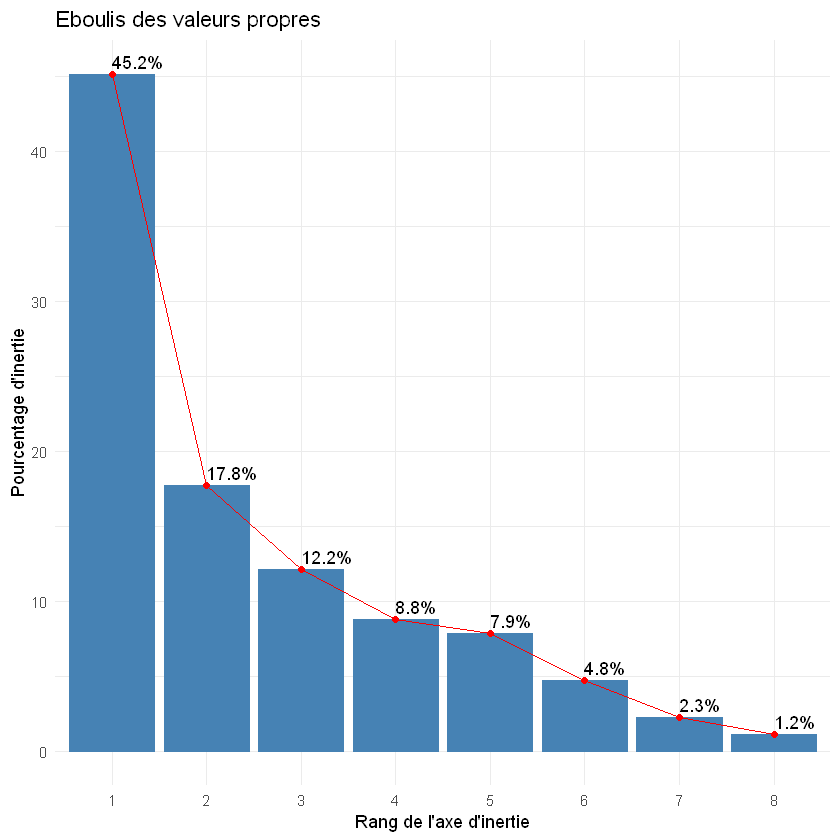

In [10]:
p <- fviz_eig(acp, addlabels = TRUE,linecolor ="red") + theme_minimal()

p + labs(title = "Eboulis des valeurs propres",
         x = "Rang de l'axe d'inertie", y = "Pourcentage d'inertie")

Le premier plan (PC1 + PC2) factoriel de l’ACP a permis de conserver 70 % de l’information totale. Nous ne regarderons pas les autres composantes qui, selon le critère de Kaiser, représentent moins de variabilité qu’une variable initiale

Critère de Kaiser: on ne retient que les axes dont l’inertie est supérieure à l’inertie moyenne 100/p (ici 100/8 = 12,5%, seul les deux premiers rangs possèdent un pourcentage supérieur à 12,5%)

## 7.Cercle des correlations <a class="anchor" id="7"></a>

Représentons maintenant le graphique des variables sur les deux prémières composantes

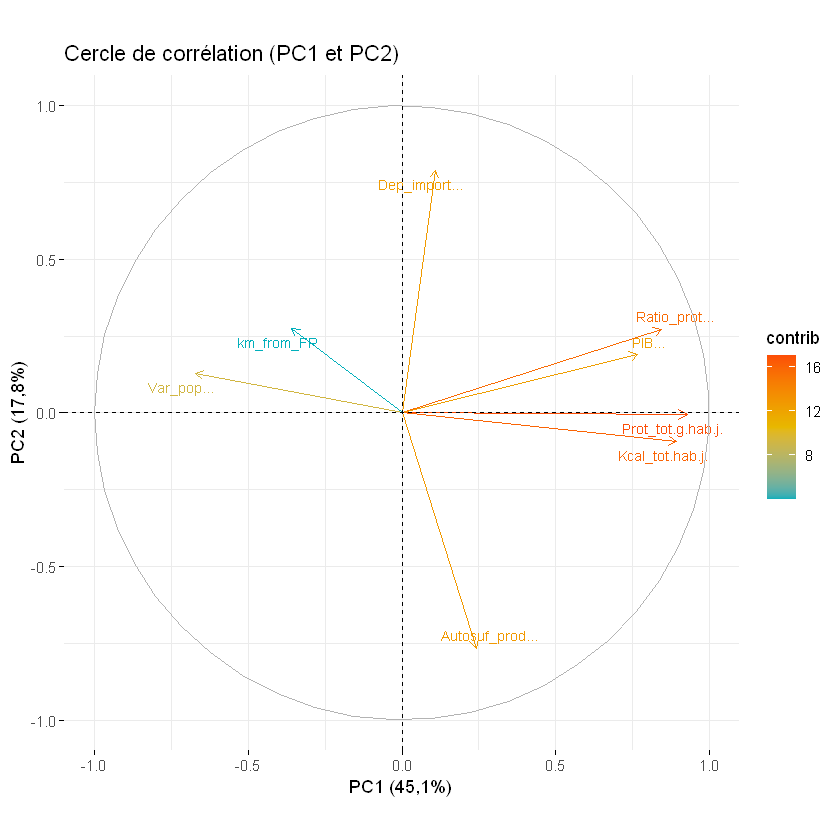

In [11]:
#options(repr.plot.res = 150, repr.plot.width = 5, repr.plot.height = 5)
#plot.PCA(acp, choix = "var")

fviz_pca_var(acp,
             title='Cercle de corrélation (PC1 et PC2)',
             col.var = "contrib",
             gradient.cols =  c("#00AFBB", "#E7B800", "#FC4E07"),
             geom=c('arrow', 'text'), # point
             labelsize = 3,
             repel = TRUE) +
             labs(x = "PC1 (45,1%)", y = "PC2 (17,8%)")

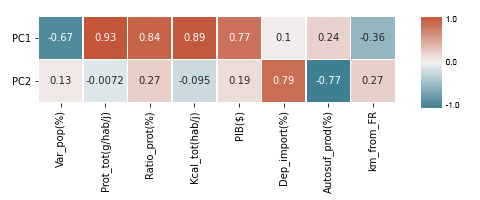

Ici, l’axe PC2 reflète bien le taux de dépendance aux importations et le taux d’autosuffisance. D'apres la matrice de correlation ci-dessus la dépendance à l'importation est correlée positivement à PC2 à 0,79 tandis que l'autosuffisance en production est correlée négativement à PC2 à 0,77. 

Plus la valeur de l’axe PC2 est positive, et plus le pays est importateur. Au contraire, plus les valeurs sont négatives, et plus le pays est autosuffisant avec sa production de viande de volailles et importe peu.

Plus un pays aura une croissance démographique forte entre 2015 et 2018 et plus sa valeur sur l’axe PC1 sera négative (correlation entre la variation de population et PC1 à -0,67).

Au contraire, plus la valeur de l’axe PC1 sera positive et plus le pays aura un PIB élevé, une forte consommation en protéines animales et une forte disponibilité alimentaire en protéines et en kilocalories (tres fortes correlations entre les disponibilités alimentaires et le ratio en protéine avec PC1, 0,93, 0,89 et 0,84).

La disponibilité totale en protéines est donc la variable qui contribue le plus l’axe 1.

La variable distance par rapport à la France participe à la fois à PC1 (-0,36) et PC2 (0,27). Plus un pays à une variation de population importante plus il sera éloigné de la France, de la meme facon plus un pays a un PIB par habitant faible plus il sera éloigné de la France. Enfin, plus un pays a une dépendance à l'importation plus il sera éloigné de la France.

## 8.Projection des individus sur le premier plan factoriel <a class="anchor" id="8"></a>

In [12]:
groupe <- as.factor(Data_pca$clusters)

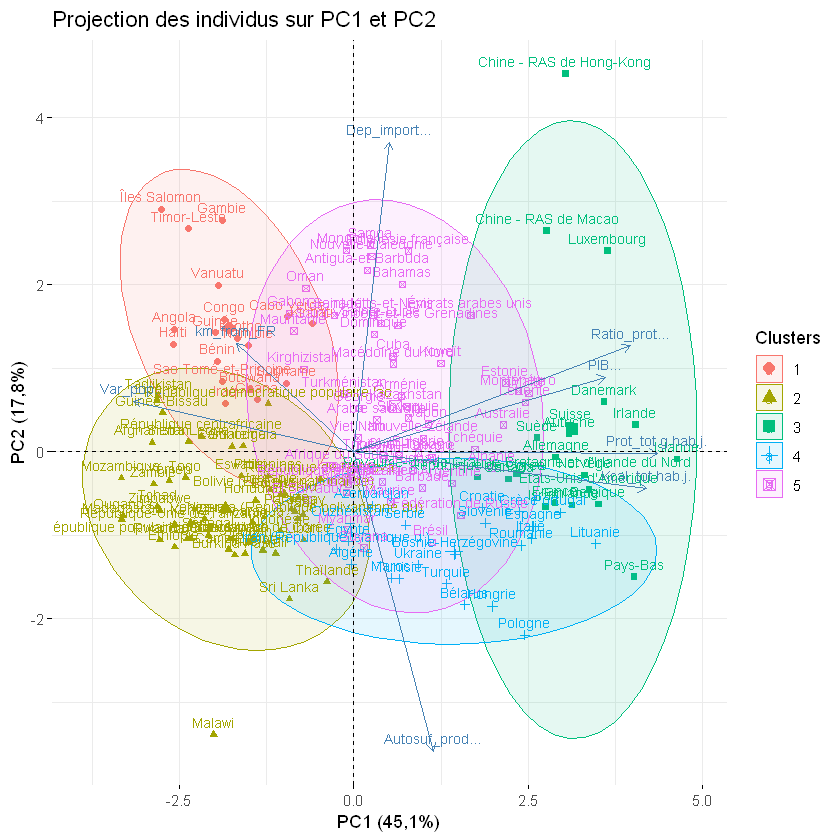

In [13]:
fviz_pca_biplot(acp, axes = c(1,2), col.ind = groupe,
             addEllipses = TRUE, labelsize = 3,title = "Projection des individus sur PC1 et PC2",legend.title = "Clusters") +
             labs(x = "PC1 (45,1%)", y = "PC2 (17,8%)")

## 9.Matrice des corrélations <a class="anchor" id="9"></a>

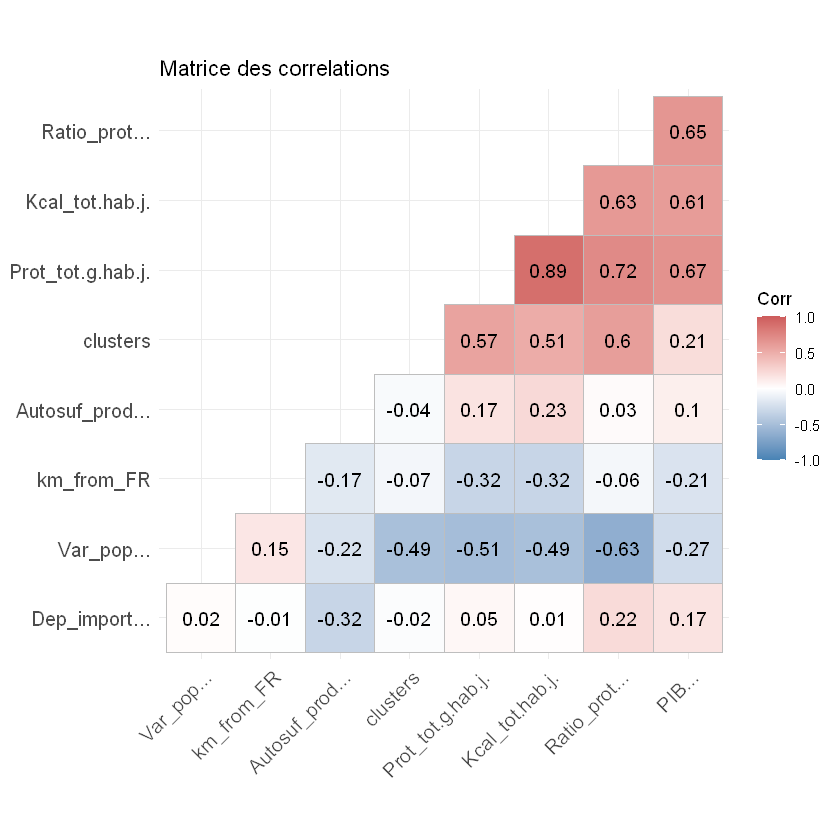

In [14]:
ggcorrplot(corr = cor(Data_pca), hc.order = TRUE, type = "lower",lab = TRUE, title = "Matrice des correlations",col=colorRampPalette(c("#4682B4","white","#CD5C5C"))(2.5))

Les relations entre variables peuvent etre mise en évidence à l’aide d’une matrice de corrélation dont les valeurs du coefficient r indique le degré de corrélation linéaire.

Ici, il y a une forte corrélation positive entre les disponibilités en protéines totales et en kilocalories, avec un r de 0,89.

De même, il existe une corrélation positive assez forte entre le ratio de protéines animales, le PIB et les disponibilités citées précédemment (r = 0,61, 0,65 et 0,66).

Au contraire, il y a une corrélation assez négative entre ce ratio et la variation de population (r = -0,63).

Ce graphique nous montre qu'il y a une forte correlation entre le PIB et le ratio de proteine par rapport à la disponibilité alimentaire, la disponibilité alimentaire en calories et la disponibilité alimentaire en g de proteine. Il existe également une forte correlation négative entre la variation de population et le ratio de proteine par rapport à la disponibilité alimentaire.

## 10.Calcul et export CSV des centroides <a class="anchor" id="10"></a>

In [15]:
res.ind <- get_pca_ind(acp)

#head(res.ind)

In [16]:
Datax <- res.ind$coord[,1:7]
head(Datax)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7
Kiribati,-0.5939348,1.5298017,1.7522134,0.2515388,0.52385980,1.15567441,0.01139832
Guinée,-1.9802532,1.4211544,-1.7488479,-0.3005686,0.94620979,0.79071512,-0.43448463
Haïti,-2.5882978,1.2889867,-0.1942823,-0.9252421,0.02193807,-0.46985864,-0.81183622
Îles Salomon,-2.7523229,2.9012141,0.7997443,0.3667452,1.05909631,0.77373806,-0.47376096
Iraq,-1.8337672,0.5755568,-1.3358280,0.1832283,-0.28582227,0.14049738,-0.25598401
Lesotho,-1.6640994,1.3593082,0.3755342,-0.9451849,-0.10535524,-0.05118208,-0.74187365


In [17]:
Datax <- cbind(Zone = rownames(Datax), Datax)
colnames(Datax)

[1] "Zone"  "Dim.1" "Dim.2" "Dim.3" "Dim.4" "Dim.5" "Dim.6" "Dim.7"

In [18]:
total <- merge(Datax,Data2,by="Zone")
head(total)

,Zone,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Var_pop...,Prot_tot.g.hab.j.,Ratio_prot...,Kcal_tot.hab.j.,PIB...,Dep_import...,Autosuf_prod...,km_from_FR,clusters
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Afghanistan,-2.88412320822176,0.108571869147884,-0.731998315233809,0.0664643992770315,0.0399926827435263,-0.518079176991774,-0.0682231889132378,8.0141803,55.52,19.43444,2040,483.8859,47.16981,54.716981,5572.71,2
2,Afrique du Sud,-0.306840562835922,-0.171902162915743,0.692466309015846,0.292807639427003,-0.24557912217365,0.401811926014632,0.157027584310038,4.3458636,84.37,42.70475,2899,6369.2316,23.11490,79.084381,8789.06,5
3,Albanie,1.98273527646292,-0.196108216687649,-0.398919172184183,-1.04451250726034,-1.1025437136821,0.796791149582669,0.206729287386241,-0.2767209,115.74,53.35234,3360,5254.3848,44.44444,59.259259,1545.60,5
4,Algérie,-0.0349428873570801,-1.35137628493516,-1.16628092367695,0.495652051885985,-0.678677548857959,0.983873580471621,-0.0993111598322723,6.2927910,91.83,26.93020,3322,4153.9572,0.00000,100.000000,2023.54,4
5,Allemagne,2.89756702126483,-0.0703728719183115,-0.847902755800721,0.227962360446785,-0.154011913965528,-0.369116463182392,-0.0622799497725089,1.6347341,105.40,60.74953,3554,47684.7552,52.28091,94.297719,815.79,3
6,Angola,-2.57518300161274,1.46869934064958,-0.915237299569341,0.513542953417448,0.0152571596994348,-0.0547877196134717,0.364623735278824,10.4934730,53.05,30.74458,2385,3289.6434,92.54144,7.458564,6574.32,1


In [36]:
total2 <- total[,c(2,3,4,5,6,7,8,17)]
head(total2)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,clusters
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,-2.88412320822176,0.108571869147884,-0.731998315233809,0.0664643992770315,0.0399926827435263,-0.518079176991774,-0.0682231889132378,2
2,-0.306840562835922,-0.171902162915743,0.692466309015846,0.292807639427003,-0.24557912217365,0.401811926014632,0.157027584310038,5
3,1.98273527646292,-0.196108216687649,-0.398919172184183,-1.04451250726034,-1.1025437136821,0.796791149582669,0.206729287386241,5
4,-0.0349428873570801,-1.35137628493516,-1.16628092367695,0.495652051885985,-0.678677548857959,0.983873580471621,-0.0993111598322723,4
5,2.89756702126483,-0.0703728719183115,-0.847902755800721,0.227962360446785,-0.154011913965528,-0.369116463182392,-0.0622799497725089,3
6,-2.57518300161274,1.46869934064958,-0.915237299569341,0.513542953417448,0.0152571596994348,-0.0547877196134717,0.364623735278824,1


In [20]:
total2[] <- lapply(total2, function(x) {
    if(is.factor(x)) as.numeric(as.character(x)) else x
})

sapply(total2, class)

Dim.1     Dim.2     Dim.3     Dim.4     Dim.5     Dim.6     Dim.7  clusters 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "integer"

In [21]:
Centroides <- aggregate(total2[, 1:7], list(total2$clusters), mean)
colnames(Centroides)[1] <- "Clusters"

Centroides

Clusters,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.7865140,1.4756038,-0.323359362,-0.1988477,0.2988364,0.2491087,-0.16676230
2,-1.8330487,-0.6905691,0.003647004,0.1571194,0.1132947,-0.2149235,-0.04142472
3,3.1392468,0.2636933,-0.575400539,0.8081920,0.5225290,-0.4552787,-0.18048784
4,1.4358814,-1.1930471,-0.369142967,-0.5357110,-0.3611380,0.3835587,-0.01534135
5,0.5910975,0.5414624,0.451071078,-0.1601634,-0.2459986,0.1314170,0.16255489


In [22]:
#write.csv(x = Centroides, file = "C:/Users/33643/Desktop/P5/CSV/livrables/Centroides.csv")

## 11.Tests statistiques <a class="anchor" id="11"></a>

Recherche d'une similitude avec la courbe de Gauss parmis les variables

In [23]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

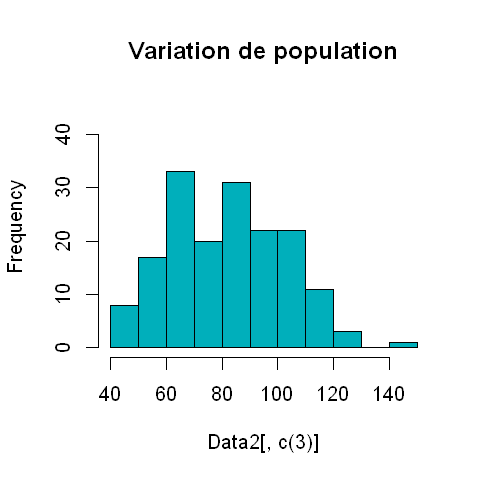

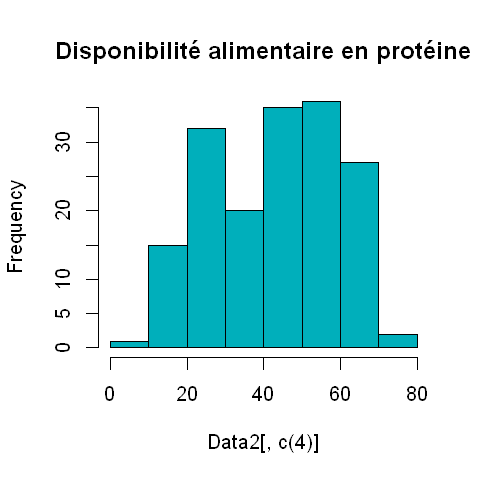

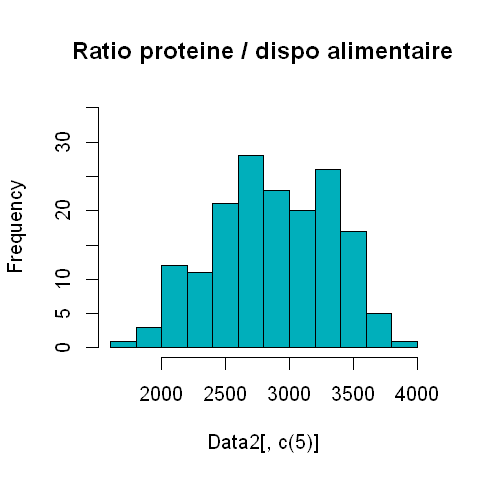

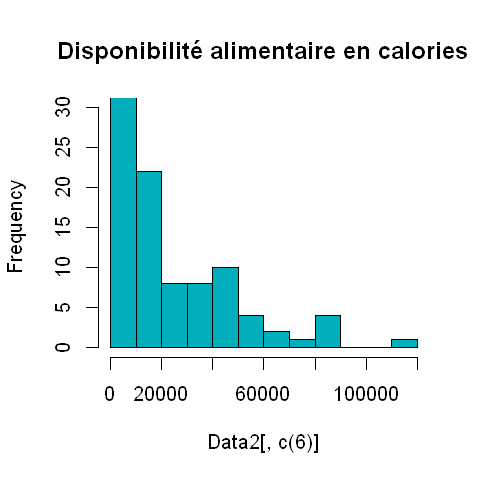

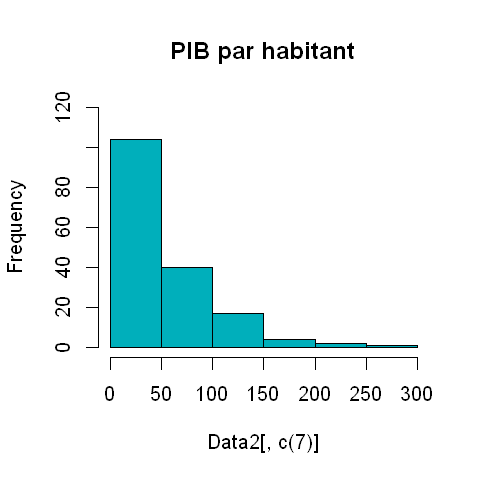

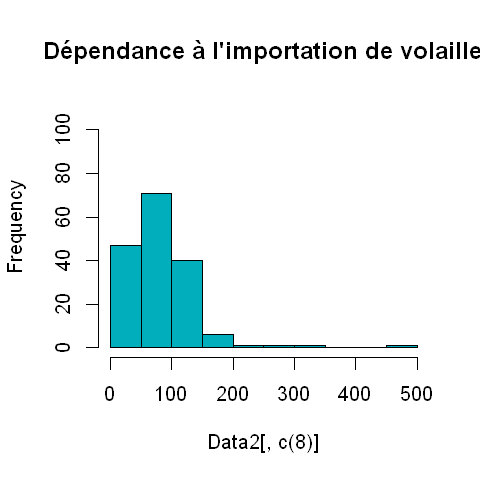

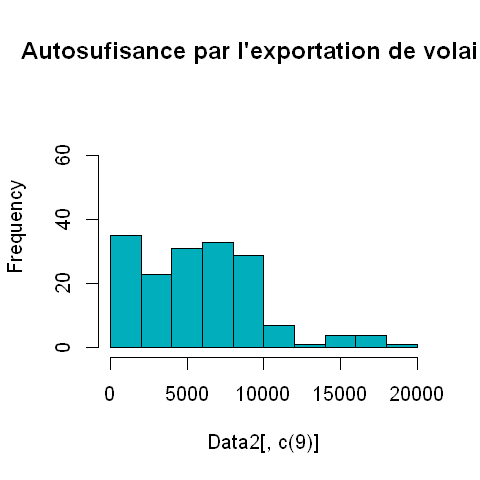

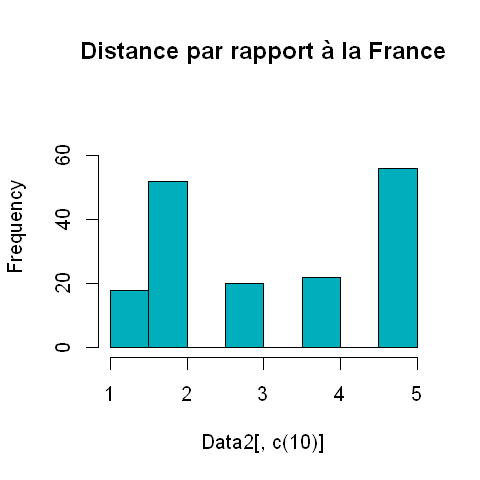

In [24]:
fig(4, 4)
hist(Data2[,c(3)], main = "Variation de population",ylim=c(0,45),col = "#00AFBB")
hist(Data2[,c(4)], main = "Disponibilité alimentaire en protéine",ylim=c(0,35),col = "#00AFBB")
hist(Data2[,c(5)], main = "Ratio proteine / dispo alimentaire",ylim=c(0,35),col = "#00AFBB")
hist(Data2[,c(6)], main = "Disponibilité alimentaire en calories",ylim=c(0,30),col = "#00AFBB")
hist(Data2[,c(7)], main = "PIB par habitant",ylim=c(0,120),col = "#00AFBB")
hist(Data2[,c(8)], main = "Dépendance à l'importation de volaille",ylim=c(0,110),col = "#00AFBB")
hist(Data2[,c(9)], main = "Autosufisance par l'exportation de volaille",ylim=c(0,75),col = "#00AFBB")
hist(Data2[,c(10)], main = "Distance par rapport à la France",ylim=c(0,75),col = "#00AFBB")

#Data_pays_clusters_2018["Prot_tot(g/hab/j)"].hist()
#Data_pays_clusters_2018["Ratio_prot(%)"].hist()

Les variables présentant une similitude avec la forme d'une courbe de Gauss sont la variation de population, la disponibilité alimentaire en proteine et la disponibilité alimentaire en calories.

Je vais donc confirmer ces affirmations par des tests.

## // Tests de Kolmogorov Smirnov

## Variation de population

In [25]:
echantillon = Data2[,c(2)]
ks.test(echantillon,"pnorm",mean=mean(echantillon),sd=sd(echantillon))


	One-sample Kolmogorov-Smirnov test

data:  echantillon
D = 0.066662, p-value = 0.4442
alternative hypothesis: two-sided


Hypothèse H0 : la variation de population suit une distribution gaussienne

La p-value est supérieure au seuil de 5%. L'hypothèse H0 n'est ainsi pas rejettée

## Test de Shapiro-wilk

In [26]:
shapiro.test(Data2[,c(2)])


	Shapiro-Wilk normality test

data:  Data2[, c(2)]
W = 0.98727, p-value = 0.1319


## Disponibilité alimentaire en proteine

In [27]:
echantillon = Data2[,c(3)]
ks.test(echantillon,"pnorm",mean=mean(echantillon),sd=sd(echantillon))

Warning message in ks.test(echantillon, "pnorm", mean = mean(echantillon), sd = sd(echantillon)):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  echantillon
D = 0.078641, p-value = 0.2499
alternative hypothesis: two-sided


Hypothèse H0 : la disponibilité alimentaire en proteine suit une distribution gaussienne

La p-value est supérieure au seuil de 5%. L'hypothèse H0 n'est ainsi pas rejettée

## Test de Shapiro-wilk

In [28]:
shapiro.test(Data2[,c(3)])


	Shapiro-Wilk normality test

data:  Data2[, c(3)]
W = 0.98163, p-value = 0.02529


La p-value est inférieure au seuil de 5%. L'hypothèse H0 est ainsi rejettée

La disponibilité alimentaire en proteine ne suit pas une distribution Gausienne

## Disponibilité alimentaire en calories

In [29]:
echantillon = Data2[,c(5)]
ks.test(echantillon,"pnorm",mean=mean(echantillon),sd=sd(echantillon))

Warning message in ks.test(echantillon, "pnorm", mean = mean(echantillon), sd = sd(echantillon)):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  echantillon
D = 0.078032, p-value = 0.258
alternative hypothesis: two-sided


Hypothèse H0 : la disponibilité alimentaire en calories suit une distribution gaussienne

La p-value est supérieure au seuil de 5%. L'hypothèse H0 n'est ainsi pas rejettée

## Test de Shapiro-wilk

In [30]:
shapiro.test(Data2[,c(5)])


	Shapiro-Wilk normality test

data:  Data2[, c(5)]
W = 0.98533, p-value = 0.07465


## // Tests de comparaison

Restriction des clusters 1 et 3 et des valeurs de la colonne disponibilité alimentaire en protéine (la seule variable qui à une distribution similaire à la courbe de Gauss selon le test de Shapiro-wilk)

In [31]:
echantillon1 = Data2[Data2[, "clusters"] == 1,][,c(3)]
echantillon2 = Data2[Data2[, "clusters"] == 3,][,c(3)]

In [32]:
var.test(echantillon1, echantillon2) # egalité des variances


	F test to compare two variances

data:  echantillon1 and echantillon2
F = 0.30801, num df = 17, denom df = 19, p-value = 0.01816
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1199870 0.8110194
sample estimates:
ratio of variances 
         0.3080058 


Hypothèse H0 : les variances des deux variables sont égales

La p-value est inférieure au seuil de 5%. L'hypothèse H0 est ainsi rejettée

les deux clusters ne suivent pas la même loi de distribution pour la disponibilité alimentaire en protéine

In [33]:
t.test(echantillon1, echantillon2) # egalité des moyenne


	Welch Two Sample t-test

data:  echantillon1 and echantillon2
t = -16.61, df = 30.268, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -56.51959 -44.14686
sample estimates:
mean of x mean of y 
 61.57278 111.90600 


La p-value est inférieure au seuil de 5%. L'hypothèse H0 est ainsi rejettée

les deux clusters ne suivent pas la même loi de distribution pour la disponibilité alimentaire en proteine.

## Selection d'une liste de pays dans le cluster 3

In [34]:
Data_cluster3 = Data_pca[Data_pca[, "clusters"] == 3,]

Ordonancement par la dépendance à l'importation de volaille, prise en compte de la distance par rapport à la France (-1000 km) , du PIB par habitant, et de la variation de population pour faire une première selection.

In [35]:
Data_cluster3[order(-Data_cluster3$Dep_import),]

,Var_pop...,Prot_tot.g.hab.j.,Ratio_prot...,Kcal_tot.hab.j.,PIB...,Dep_import...,Autosuf_prod...,km_from_FR,clusters
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Chine - RAS de Hong-Kong,2.5883663,128.53,73.08800,3267,49065.40,277.3648649,8.445946,9773.82,3
Pays-Bas,0.7202739,106.69,65.43256,3297,53579.54,250.0000000,458.974359,854.00,3
Belgique,1.7186393,99.87,58.65625,3769,47354.64,187.0370370,290.123457,503.78,3
Chine - RAS de Macao,4.9833887,109.47,64.77574,3327,87208.46,118.1818182,18.181818,9753.19,3
Luxembourg,6.5255732,108.65,62.09848,3465,117369.54,109.0909091,0.000000,493.75,3
Danemark,1.1074002,117.08,68.09874,3401,62043.06,90.9677419,100.645161,1224.21,3
Irlande,3.5898538,117.58,61.24341,3885,80137.06,83.3333333,119.047619,1093.78,3
Autriche,2.4426777,109.12,60.32808,3695,51183.78,64.7727273,86.363636,947.56,3
Allemagne,1.6347341,105.40,60.74953,3554,47684.76,52.2809124,94.297719,815.79,3


Les premiers pays selectionnés sont ceux qui sont proches de la France, qui ont un fort PIB par habitant, un forte dépendance à l'importation de volaille, et une croissance demographique positive, à savoir :

- Pays-bas (53k PIB, 250% de dépendance à l'import, 854 km / France)
- Belgique (47 PIB, 187% de dépendance à l'import, 503 km / France)
- Luxembroug (117k PIB, 64% de dépendance à l'import, 493 km / France)
- Danemark (62k PIB, 91% de dépendance à l'import, 1224 km / France)
- Ireland (80k PIB, 83% de dépendance à l'import, 1093 km / France)
- Autriche (51k PIB, 250% de dépendance à l'import, 947 km / France)
- Allemagne (47k PIB, 52% de dépendance à l'import, 815 km / France)
- Suède (55k PIB, 42% de dépendance à l'import, 1882 km / France)
- Royaume unis (42 PIB, 37% de dépendance à l'import, 1091 km / France)
- Suisse (86k PIB, 34% de dépendance à l'import, 464 km / France)

Pour la seconde selection nous pouvons envisager de choisir les pays plus lointoin présentant un PIB elevé et une forte dépendance à l'importation, voici ces pays : 

- Hongkong (49k PIB, 277% de dépendance à l'import, 9773 km / France)
- Macao (87 PIB, 250% de dépendance à l'import, 9753 km / France)